# My Identity

**Nama:** NAFIATUL FADLILAH <br>

# Preprocessing

## Import Library

In [1]:
# untuk mengolah dataframe
import pandas as pd

# untuk mengolah data teks
import string, re

# install library Sastrawi untuk pengolahan teks berbahasa Indonesia
!pip install Sastrawi

# untuk stemming (mengubah kata ke bentuk kata dasar)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# untuk menghapus kata yang tidak kontributif
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
# untuk melihat progress bar
from tqdm import tqdm
tqdm.pandas()

## Loading Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# inisialisasi path direktori
path = "/content/drive/MyDrive/ML_Data/sample_data.csv"

In [ ]:
df = pd.read_csv(path)
df.shape

(1200, 3)

In [ ]:
df.head()

,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


## Checking the Data and Handling Treatment

### Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment        1200 non-null   object
 1   Customer Review  1200 non-null   object
 2   corpus           1200 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


### Rename Column

In [ ]:
df.rename(columns = {'Customer Review' : 'CustomerReview'}, inplace = True)

In [ ]:
df.head()

,Sentiment,CustomerReview,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


### Selecting CustomerReview

In [ ]:
df = df[df.CustomerReview.str.split().str.len()>1]
print(df.shape)
df.head()

(1182, 3)


,Sentiment,CustomerReview,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


### Checking Class Proportion

In [ ]:
df.Sentiment.value_counts()

Sentiment
Negative    593
Positive    589
Name: count, dtype: int64

### Downsampling

In [ ]:
num_sample = 500
ds_positive_label = df[df.Sentiment=='Positive'].sample(n = num_sample, random_state = 1)
ds_positive_label.head()

,Sentiment,CustomerReview,corpus
517,Positive,Cantik Banget,cantik banget
573,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...","sampe cepet ..makasihh yahh,,anak aku seneng b..."
23,Positive,mantab barang susuai pesanan tepat waktu,mantab barang susuai pesanan tepat waktu
565,Positive,mantap berkualitas,mantap berkualitas
92,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya. packing sangat aman ...


In [ ]:
df = pd.concat([ds_positive_label, df[df.Sentiment=='Negative'].iloc[:num_sample]], axis = 0)
print(df.shape)
df.head()

(1000, 3)


,Sentiment,CustomerReview,corpus
517,Positive,Cantik Banget,cantik banget
573,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...","sampe cepet ..makasihh yahh,,anak aku seneng b..."
23,Positive,mantab barang susuai pesanan tepat waktu,mantab barang susuai pesanan tepat waktu
565,Positive,mantap berkualitas,mantap berkualitas
92,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya. packing sangat aman ...


### Punctuation

In [ ]:
df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))
print(df.shape)
df.head()

(1000, 3)


,Sentiment,CustomerReview,corpus
517,Positive,Cantik Banget,cantik banget
573,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...",sampe cepet makasihh yahhanak aku seneng bangettt
23,Positive,mantab barang susuai pesanan tepat waktu,mantab barang susuai pesanan tepat waktu
565,Positive,mantap berkualitas,mantap berkualitas
92,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya packing sangat aman k...


### Slangword

In [ ]:
slang_dict = pd.read_csv('/content/drive/MyDrive/ML_Data/kamusalay.csv', encoding = 'latin1', names=['alay', 'normal'])
slang_dict = dict(zip(slang_dict.alay.tolist(), slang_dict.normal.tolist()))

In [ ]:
def cvt_slang(sentence):
  return ''.join(' ').join(t for t in [slang_dict[x] if x in slang_dict.keys() else x for x in sentence.split()])

In [ ]:
df['corpus'] = df.corpus.apply(cvt_slang)
print(df.shape)
df.head()

(1000, 3)


,Sentiment,CustomerReview,corpus
517,Positive,Cantik Banget,cantik banget
573,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...",sampai cepat makasihh yahhanak aku senang banget
23,Positive,mantab barang susuai pesanan tepat waktu,mantap barang susuai pesanan tepat waktu
565,Positive,mantap berkualitas,mantap berkualitas
92,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya packing sangat aman k...


### Repetition Character

In [ ]:
def repetition_char(text):
  sub_str = re.findall(r'((\w)\2{2,})', text)
  for x in sub_str:
    text = text.replace(x[0], x[1])
  return text

In [ ]:
df['corpus'] = df.corpus.apply(repetition_char)
df = df.reset_index(drop = True)
print(df.shape)
df.head()

(1000, 3)


,Sentiment,CustomerReview,corpus
0,Positive,Cantik Banget,cantik banget
1,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...",sampai cepat makasihh yahhanak aku senang banget
2,Positive,mantab barang susuai pesanan tepat waktu,mantap barang susuai pesanan tepat waktu
3,Positive,mantap berkualitas,mantap berkualitas
4,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya packing sangat aman k...


### Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['corpus'] = df.corpus.progress_apply(lambda x : stemmer.stem(str(x)))
print(df.shape)
df.head()

100%|██████████| 1000/1000 [03:38<00:00,  4.57it/s]

(1000, 3)


,Sentiment,CustomerReview,corpus
0,Positive,Cantik Banget,cantik banget
1,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...",sampai cepat makasihh yahhanak aku senang banget
2,Positive,mantab barang susuai pesanan tepat waktu,mantap barang susuai pesan tepat waktu
3,Positive,mantap berkualitas,mantap kualitas
4,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya packing sangat aman k...


### Stopword

In [ ]:
stops = pd.read_csv('/content/drive/MyDrive/ML_Data/stopwordbahasa.csv', header = None)
stop_factory = StopWordRemoverFactory()
STOPS = stop_factory.get_stop_words() + stops[0].tolist()
STOPS = set(STOPS)

In [ ]:
df['corpus'] = df.corpus.progress_apply(lambda c : ''.join(' ').join(x for x in c.split() if x not in STOPS))
print(df.shape)
df.head()

100%|██████████| 1000/1000 [00:00<00:00, 67930.55it/s]

(1000, 3)


,Sentiment,CustomerReview,corpus
0,Positive,Cantik Banget,cantik banget
1,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...",cepat makasihh yahhanak senang banget
2,Positive,mantab barang susuai pesanan tepat waktu,mantap barang susuai pesan
3,Positive,mantap berkualitas,mantap kualitas
4,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya packing aman double k...


### Save to CSV

In [ ]:
df.to_csv('/content/drive/MyDrive/ML_Data/clean_data.csv', index = False)

# Sentiment Classification

## Import Library

In [2]:
# untuk mengolah dataframe
import pandas as pd

# untuk mengukur waktu eksekusi suatu code block
from time import time

# untuk visualisasi data
import seaborn as sns

# untuk memisahkan data train dan data test
from sklearn.model_selection import train_test_split

# untuk modelling (classification)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# untuk mengevaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# untuk mengubah data teks menjadi reprensetasi vektor menggunakan skema pembobotan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

## Loading Data

In [5]:
path = '/content/drive/MyDrive/ML_Data/clean_data.csv'

In [6]:
df = pd.read_csv(path)
print(df.shape)
df.head()

(1000, 3)


,Sentiment,CustomerReview,corpus
0,Positive,Cantik Banget,cantik banget
1,Positive,"sampe cepet ..makasihh yahh,,anak aku seneng b...",cepat makasihh yahhanak senang banget
2,Positive,mantab barang susuai pesanan tepat waktu,mantap barang susuai pesan
3,Positive,mantap berkualitas,mantap kualitas
4,Positive,Bagus banget keyboardnya. Packing sangat aman ...,bagus banget keyboardnya packing aman double k...


## Checking Data

### Possible Missing Values

In [7]:
df.isnull().sum()

Sentiment         0
CustomerReview    0
corpus            1
dtype: int64

### Handling Missing Values

In [8]:
df = df.dropna()
print(df.shape)
print(df.Sentiment.value_counts())

(999, 3)
Sentiment
Positive    500
Negative    499
Name: count, dtype: int64


## Feature Extraction

In [9]:
x , y = df.corpus, df.Sentiment

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

## Splitting Dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print('train size: ', x_train.shape)
print('test size: ', x_test.shape)

train size:  (699, 2237)
test size:  (300, 2237)


## Modelling

### Support Vector Classifier (SVC)

In [23]:
st = time()
model = SVC()
model.fit(x_train, y_train)
print('[DONE] training process finished: ', time()-st, 'second(s)\n')
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

[DONE] training process finished:  0.06127643585205078 second(s)

              precision    recall  f1-score   support

    Negative       0.82      0.92      0.87       140
    Positive       0.92      0.82      0.87       160

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



<Axes: >

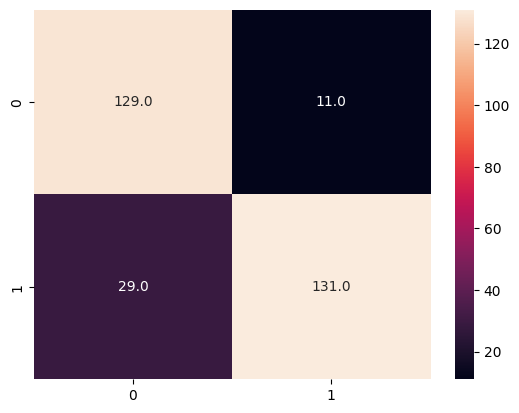

In [24]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

#### Analyzing Model

Berdasarkan hasil evaluasi metrik di atas, model yang dihasilkan dari algoritma SVC (*Support Vector Classifier*) sudah bagus dalam memprediksi class sentiment **Positive** maupun **Negative**. Hal ini ditunjukkan oleh **F1-score** yang memiliki nilai **0.87** untuk kedua class dan nilai **accuracy** yang juga **0.87**. Nilai tersebut lebih dari 0.80 dan sudah mendekati ke angka 1.0 sehingga model sudah cukup baik dalam mengenali class yang ada. Selain itu, **confusion matrix** juga menunjukkan bahwa proporsi nilai yang besar tersebut berada pada diagonal matrix (bernilai 129.0 dan 131.0) yang mengindikasikan model banyak benar dalam memprediksi data positif maupun negatif. Proporsi model salah dalam memprediksi data positif dan negatif masing-masing hanya 11.0 dan 29.0, dimana proporsi tersebut jauh lebih kecil dari proporsi model mengklasifikasikan data dengan benar.

### K-Nearest Neighbors (KNN)

In [25]:
st = time()
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print('[DONE] training process finished: ', time()-st, 'second(s)\n')
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

[DONE] training process finished:  0.004091978073120117 second(s)

              precision    recall  f1-score   support

    Negative       0.81      0.65      0.72       140
    Positive       0.74      0.87      0.80       160

    accuracy                           0.77       300
   macro avg       0.78      0.76      0.76       300
weighted avg       0.77      0.77      0.76       300



<Axes: >

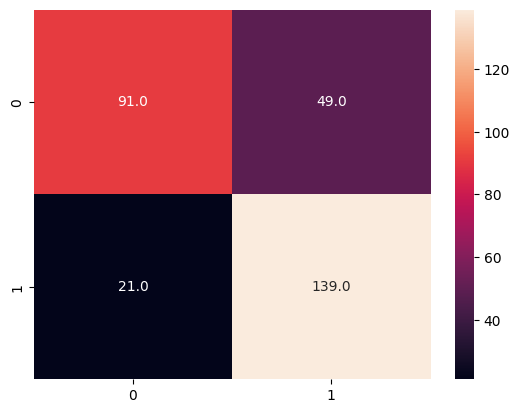

In [26]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

#### Analyzing Model

Berdasarkan hasil evaluasi metrik di atas, model yang dihasilkan dari algoritma KNN (*K-Nearest Neighbors*) cukup bagus dengan **accuracy 0.77**. Namun, jika dibandingkan dengan 2 algoritma lainnya KNN sepertinya kurang cocok diterpakan untuk memodelkan data tersebut. Hal ini karena, *confusion matrix* menunjukkan bahwa model yang dihasilkan masih belum bagus dalam memprediksi data positif atau cukup banyak melakukan kesalahan dalam memprediksi data positif yakni 49.0. Proporsi benar dalam memprediksi data positif juga cukup rendah dibandingkan proporsi benar dalam memprediksi data negatif yakni hanya 91.0. Kesimpulannya model tersebut hanya bagus dalam memprediksi data negatif namun tidak untuk data positif.

### Decision Tree Classifier

In [27]:
st = time()
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print('[DONE] training process finished: ', time()-st, 'second(s)\n')
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

[DONE] training process finished:  0.031197071075439453 second(s)

              precision    recall  f1-score   support

    Negative       0.75      0.85      0.80       140
    Positive       0.85      0.75      0.80       160

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



<Axes: >

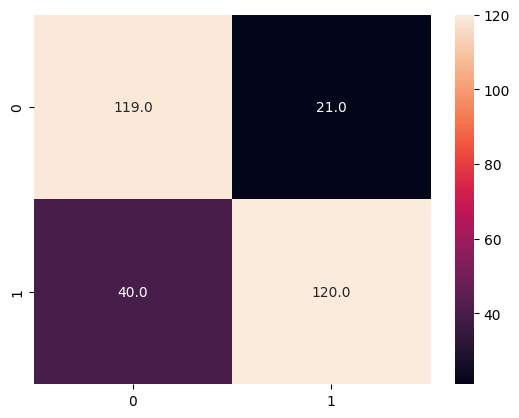

In [28]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')

#### Analyzing Model

Berdasarkan hasil evaluasi metrik di atas, model yang dihasilkan dari algoritma *Decision Tree Classifier* sudah bagus dalam memprediksi class sentiment Positive maupun Negative. Hal ini ditunjukkan oleh **F1-score** yang memiliki nilai 0.80 untuk kedua class dan nilai **accuracy** yang juga 0.80. Nilai tersebut sudah mendekati ke angka 1.0 sehingga model sudah cukup baik dalam mengenali class yang ada. Selain itu, *confusion matrix* juga menunjukkan bahwa proporsi nilai yang besar tersebut berada pada diagonal matrix (bernilai 119.0 dan 120.0) yang mengindikasikan model banyak benar dalam memprediksi data positif maupun negatif. Akan tetapi, proporsi model salah dalam memprediksi data negatif cukup tinggi yakni 40.0.

# Conclusion

Dibandingkan dengan KNN dan DT, **SVC menjadi algoritma yang paling sesuai diterapkan untuk memodelkan data tersebut dalam mengklasifikasikan sentimen positif dan negatif customer review**. Hal ini karena model hasil algoritma tersebut cukup baik dalam mengenali *class* dan paling minim *error*.